# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=20_000 # size of the population to be simulated
size1=20_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus4'
perusresults='results/perus_results4'

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [3]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1.explain()
cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=False,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True
step 0.25

train...
phase 1
batch 9 learning rate 0.125 scaled 0.375




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.974    |
| fps                | 2611     |
| nupdates           | 1        |
| policy_entropy     | 0.982    |
| policy_loss        | -0.014   |
| total_timesteps    | 0        |
| value_loss         | 0.319    |
-------------------------------

---------------------------------
| explained_variance | 0.092    |
| fps                | 2818     |
| nupdates           | 20       |
| policy_entropy     | 0.831    |
| policy_loss        | -15.3    |
| total_timesteps    | 414523   |
| value_loss         | 367      |
---------------------------------
---------------------------------
| explained_variance | 0.378    |
| fps                | 2796     |
| nupdates           | 30       |
| policy_entropy     | 0.822    |
| policy_loss        | -12.1    |
| total_timesteps    | 632693   |
| value_loss         | 239      |
---------------------------------
---------------------------------
| explained_variance | 0.567    |
| fps                | 2782     |
| nupdates           | 40       |
| policy_entropy     | 0.787    |
| policy_loss        | -7.08    |
| total_timesteps    | 850863   |
| value_loss         | 88.2     |
---------------------------------
---------------------------------
| explained_variance | 0.787    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2790     |
| nupdates           | 290      |
| policy_entropy     | 1        |
| policy_loss        | -0.0374  |
| total_timesteps    | 6305113  |
| value_loss         | 0.352    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2789     |
| nupdates           | 300      |
| policy_entropy     | 0.985    |
| policy_loss        | 0.0783   |
| total_timesteps    | 6523283  |
| value_loss         | 0.256    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2788     |
| nupdates           | 310      |
| policy_entropy     | 1        |
| policy_loss        | -0.0145  |
| total_timesteps    | 6741453  |
| value_loss         | 0.35     |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2771     |
| nupdates           | 560      |
| policy_entropy     | 0.815    |
| policy_loss        | -0.0211  |
| total_timesteps    | 12195703 |
| value_loss         | 0.301    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2771     |
| nupdates           | 570      |
| policy_entropy     | 0.858    |
| policy_loss        | -0.0585  |
| total_timesteps    | 12413873 |
| value_loss         | 0.405    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2771     |
| nupdates           | 580      |
| policy_entropy     | 0.825    |
| policy_loss        | 0.0433   |
| total_timesteps    | 12632043 |
| value_loss         | 0.307    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2774     |
| nupdates           | 830      |
| policy_entropy     | 0.788    |
| policy_loss        | 0.0305   |
| total_timesteps    | 18086293 |
| value_loss         | 0.304    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2775     |
| nupdates           | 840      |
| policy_entropy     | 0.788    |
| policy_loss        | -0.012   |
| total_timesteps    | 18304463 |
| value_loss         | 0.302    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2776     |
| nupdates           | 850      |
| policy_entropy     | 0.804    |
| policy_loss        | -0.0272  |
| total_timesteps    | 18522633 |
| value_loss         | 0.388    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

BrokenPipeError: [Errno 32] Broken pipe

No mortality included


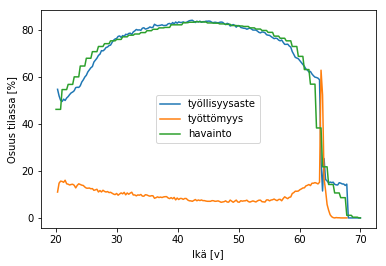

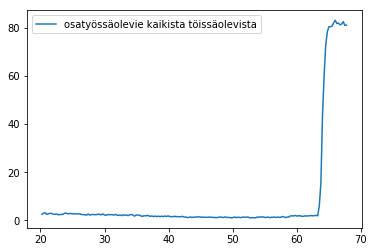

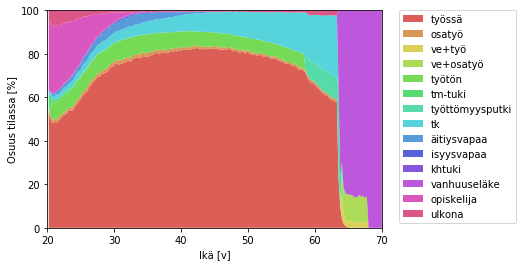

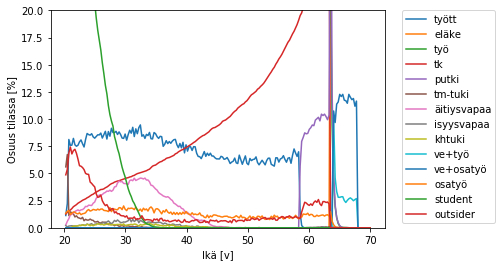

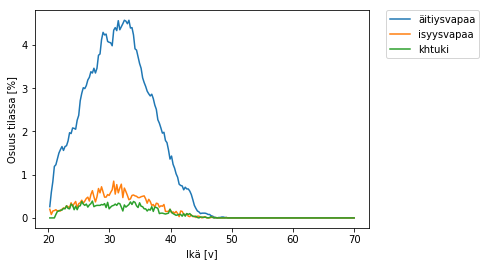

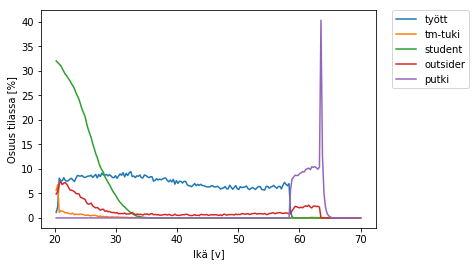

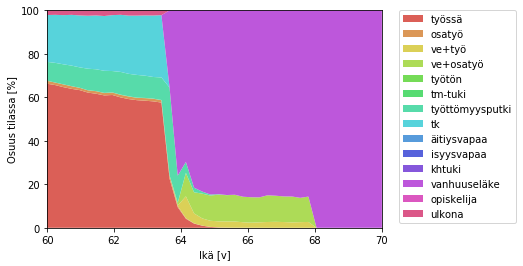

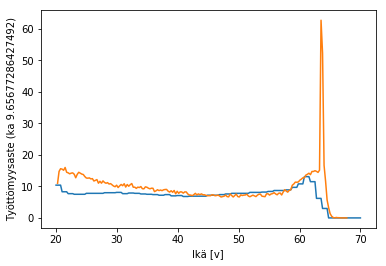

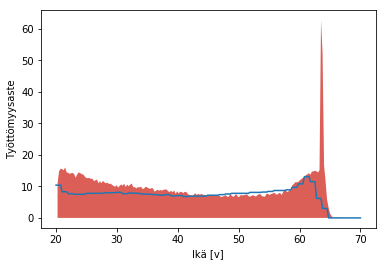

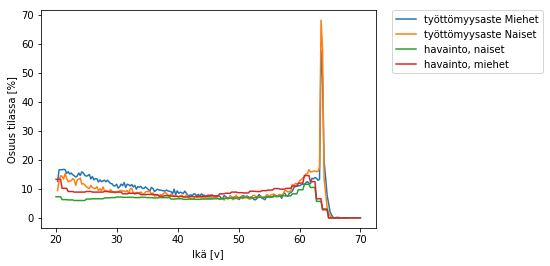

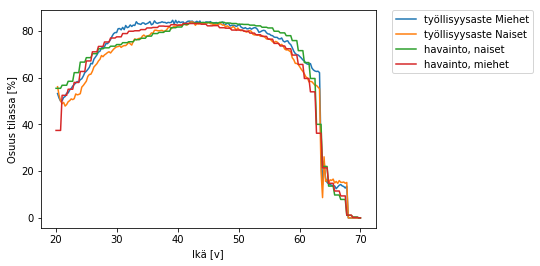

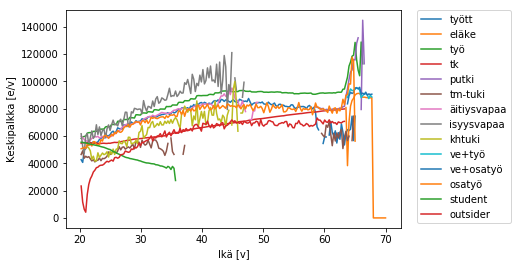

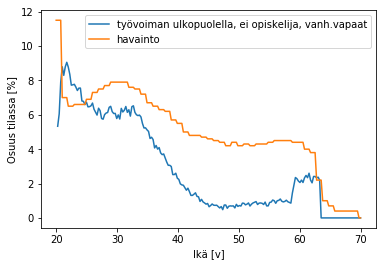

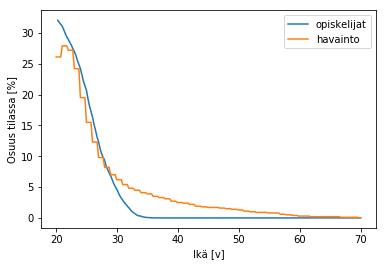

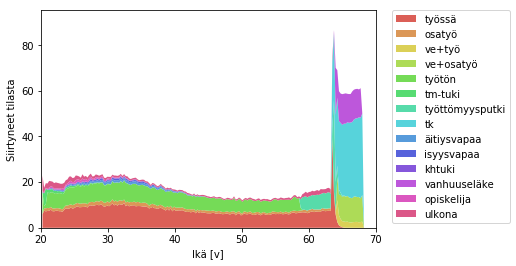

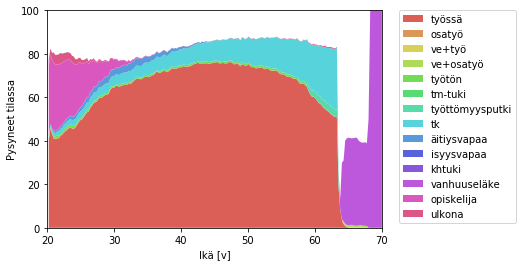

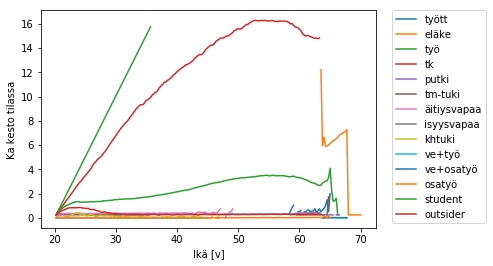

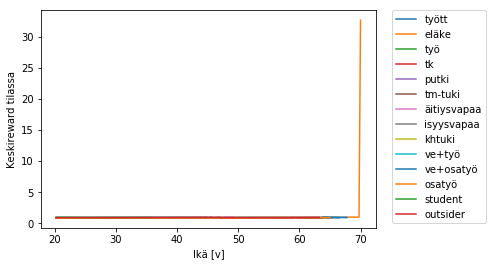

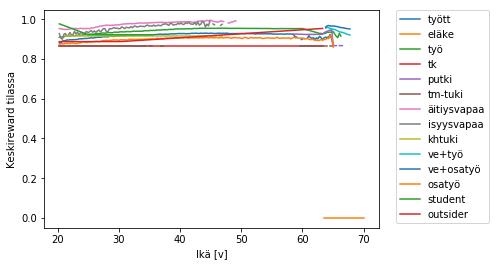

No handles with labels found to put in legend.


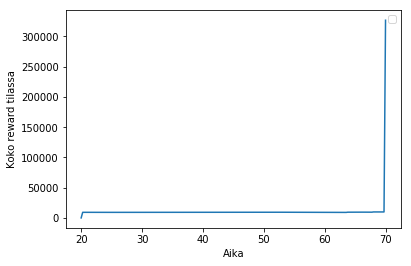

Yhteensä reward 220.0700255114858


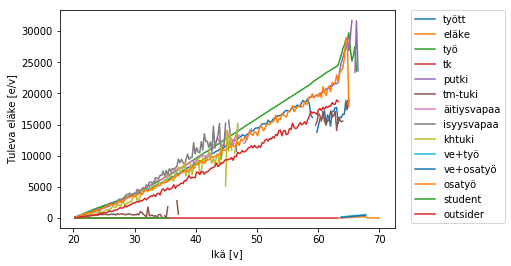

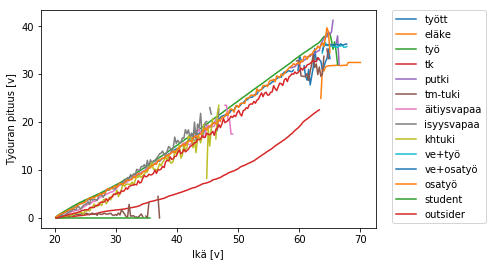

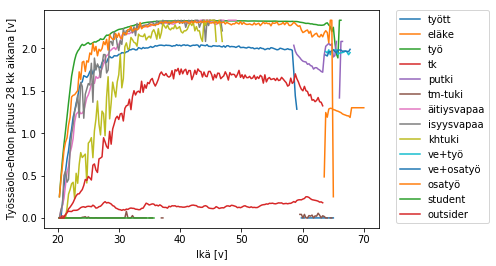

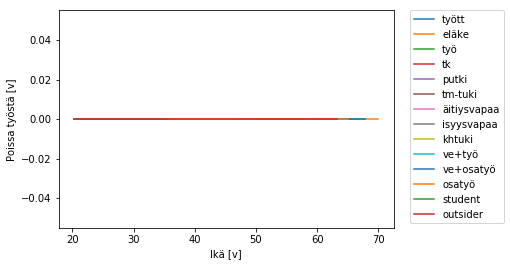

In [4]:
cc1b=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1b.render(load=perusresults)

# Deep Q-network

Kokeillaan toista menetelmää ratkaisuun. Muutos on helppo tehdä, muutetaan vain algoritmin valintaa säätelevän parametrin _rlmodel_ arvo, ja varmistetaan että kaikki lähtee alusta liikkeelle (_cont=False_). Deep Q-network on menetelmänä hitaampi kuin ACKTR, joten tässä aika-askelten määrä on rajattu 1 000 000:aan. Jos halutaan konvergenssia, tarvitaan kuitenkin enemmän askelia.

In [ ]:
cc1q=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1q.explain()
cc1q.run_results(debug=False,steps1=1_000_000,steps2=size2,pop=1_000,deterministic=deterministic,
                train=True,predict=True,batch1=1,batch2=batch2,
                save=perusmalli+'_dqn',plot=True,cont=False,start_from=perusmalli+'_dqn',results=perusresults+'_dqn',
                callback_minsteps=callback_minsteps,rlmodel='dqn',twostage=False)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True
step 0.25

train...
phase 1
batch 1 learning rate 0.25 scaled 0.25


training...

